# Import Packages

In [18]:
# working directory
from os import chdir

# must haves
import pandas as pd

# machine learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# saving model
import pickle

# Set Working Directory

In [2]:
chdir("/Users/cellan/Documents/Python_Projects/Flask-WebAPI/predict_iris/")

# Load Data

In [3]:
iris_data = load_iris()

df_raw = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df_raw['target'] = pd.Series(iris_data.target)

df_raw.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Pre-Processing

## Re-Name Data

In [4]:
df = df_raw.copy()

## Re-Naming Variables

In [5]:
df.rename({'sepal length (cm)': 'sepal_length', 
           'sepal width (cm)': 'sepal_width',
           'petal length (cm)': 'petal_length',
           'petal width (cm)': 'petal_width',
           'target': 'species'
          }, 
           axis = 1,
           inplace = True
         )

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Target Variable

In [6]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

## Species Names

In [7]:
mapping = {0: 'setosa', 
           1: 'versicolor', 
           2: 'virginica'
          }

df.replace({'species': mapping}, inplace = True)

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Exploration 

## Size of the Data

In [8]:
df.shape

(150, 5)

## NA Values?

In [9]:
df.isnull().any(axis = 1).sum()

0

## Statistical Summary

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualising Data

### Box Plots

<AxesSubplot:xlabel='species', ylabel='petal_width'>

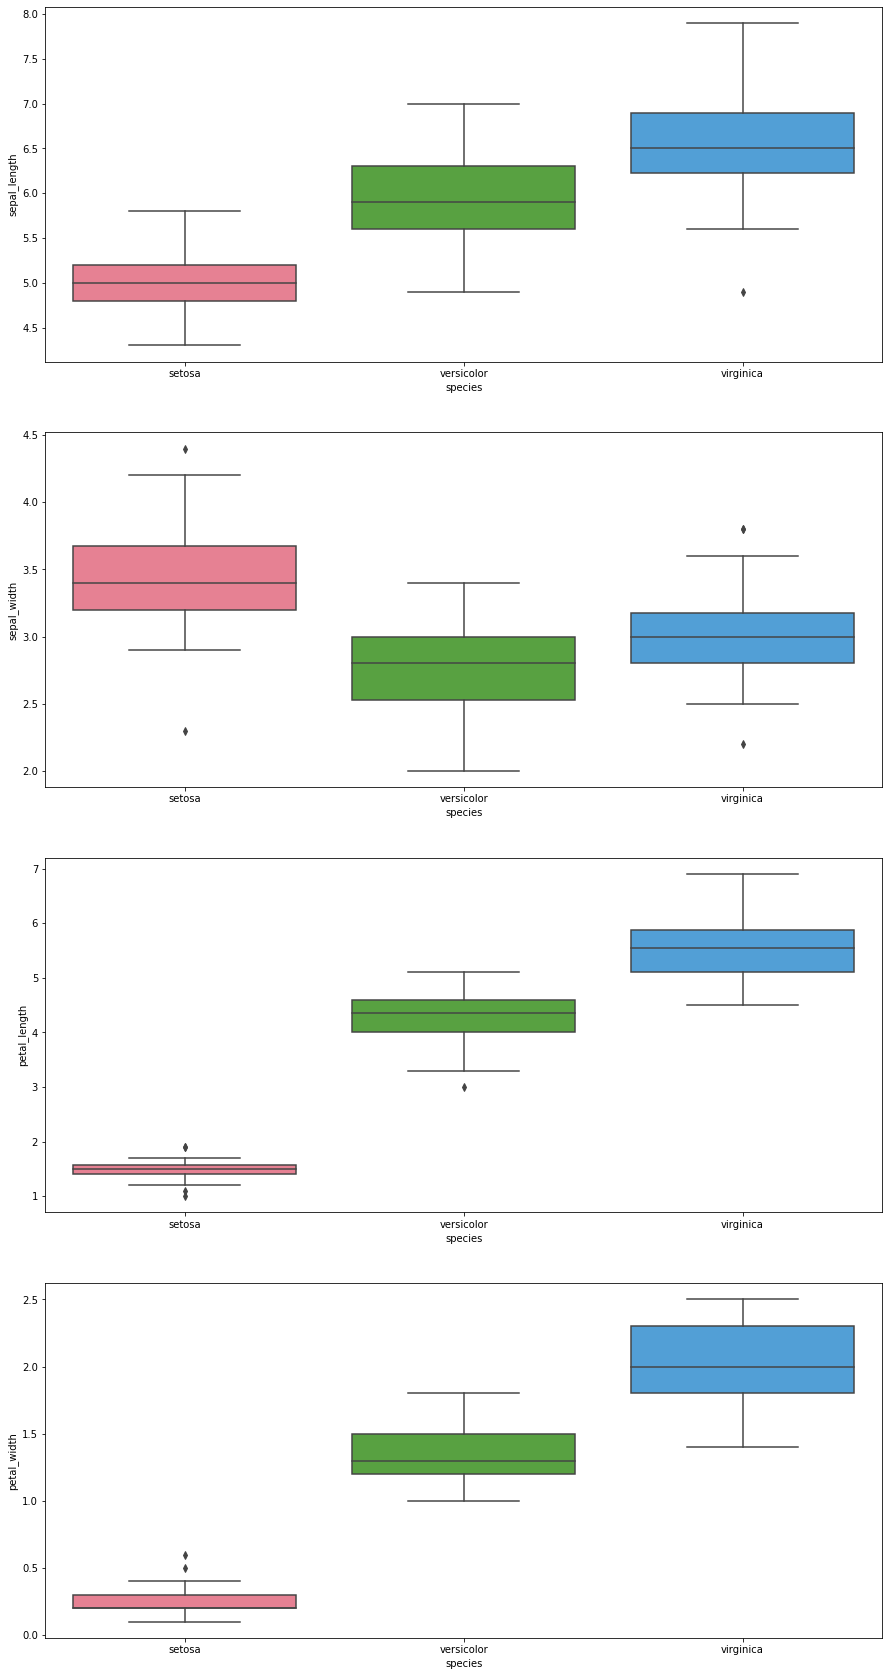

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(15,30))

sns.boxplot(x="species", y="sepal_length", palette="husl", data = df, ax = axs[0])
sns.boxplot(x="species", y="sepal_width", palette="husl", data = df, ax = axs[1])
sns.boxplot(x="species", y="petal_length", palette="husl", data = df, ax = axs[2])
sns.boxplot(x="species", y="petal_width", palette="husl", data = df, ax = axs[3])

### Pairplot

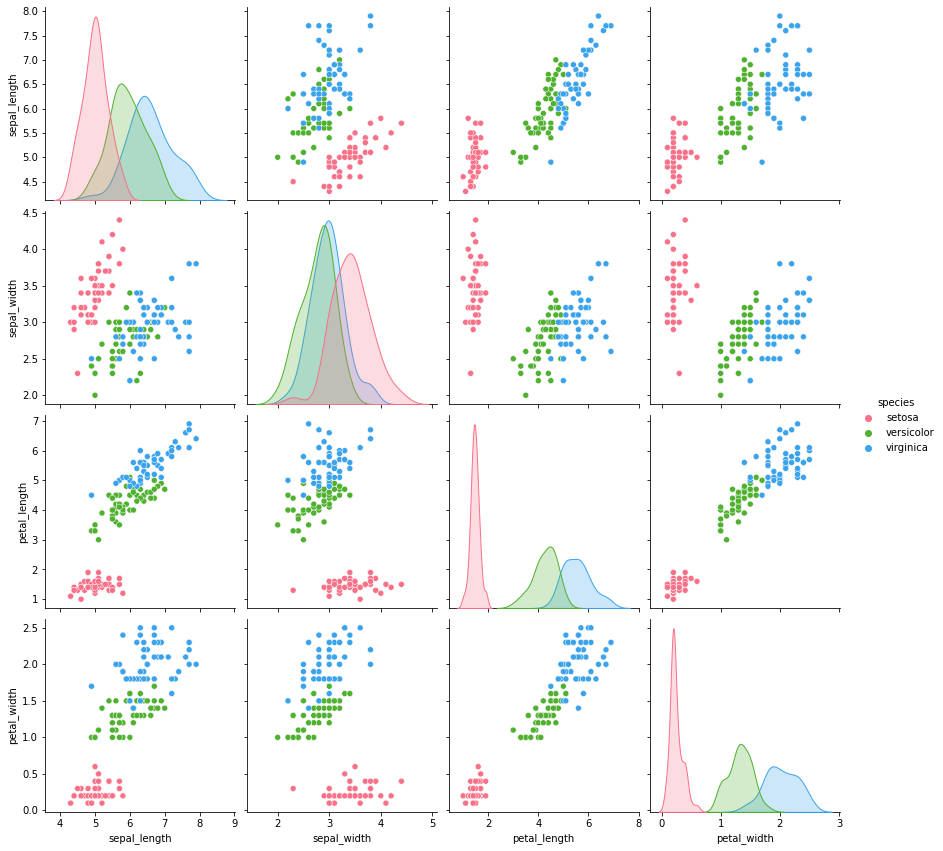

In [12]:
sns.pairplot(df, hue = "species", palette = "husl", height = 3)

### Heat Map

<AxesSubplot:>

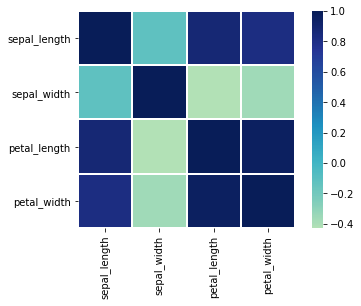

In [14]:
sns.heatmap(df.drop('species', axis = 1).corr(), cmap = "YlGnBu", 
            center = 0, square = True, linewidths = 1, linecolor = "white"
           )

# Train/Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis = 1), df['species'], 
                                                    test_size = 0.30, random_state=42)

print((X_train.shape, X_test.shape))

((105, 4), (45, 4))


# Feature Transformation

In [19]:
X_train_scaled = X_train.copy()

scaler = MinMaxScaler()

X_train_scaled[['sepal_length', 
                'sepal_width', 
                'petal_length', 
                'petal_width']] = scaler.fit_transform(X_train_scaled[['sepal_length',
                                                                       'sepal_width',
                                                                       'petal_length', 
                                                                       'petal_width']])
X_train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
81,0.352941,0.181818,0.464286,0.375000
133,0.588235,0.363636,0.714286,0.583333
137,0.617647,0.500000,0.785714,0.708333
75,0.676471,0.454545,0.589286,0.541667
109,0.852941,0.727273,0.892857,1.000000


# Building Models

## Choosing the Best Model

                            accuracy_mean  accuracy_std
model_name                                             
LinearDiscriminantAnalysis       0.950909      0.070052
SVC                              0.931818      0.079282
GaussianNB                       0.931818      0.079282
RandomForestClassifier           0.931818      0.092238
DecisionTreeClassifier           0.922727      0.089201
KNeighborsClassifier             0.921818      0.089402
LogisticRegression               0.826364      0.101364


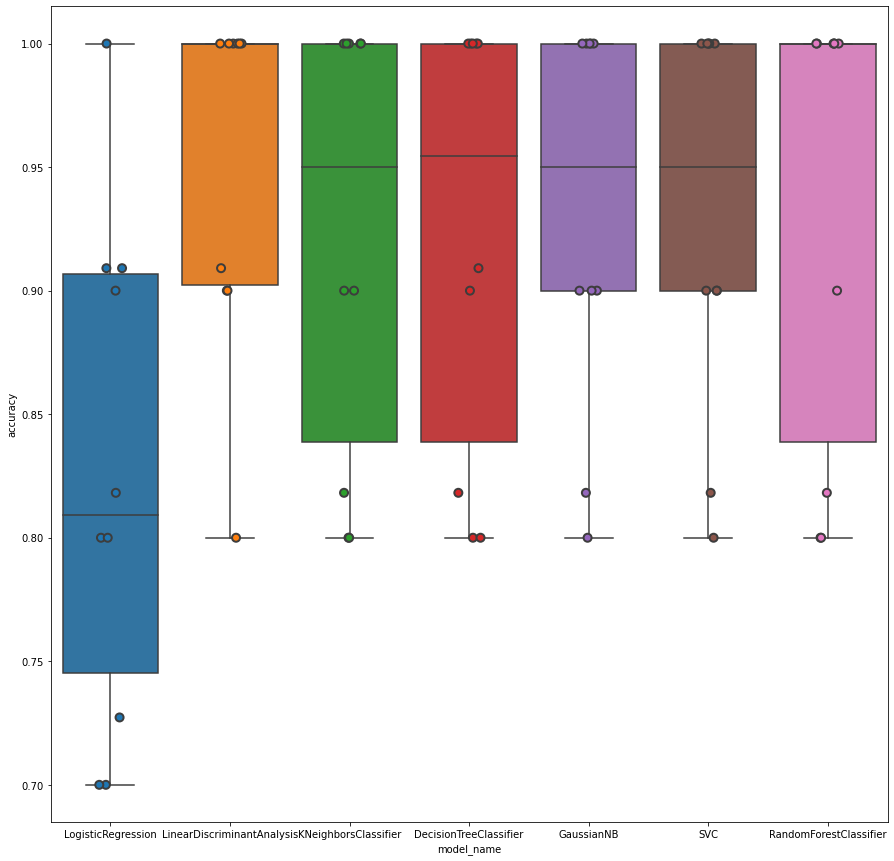

In [20]:
models = []
models.append(LogisticRegression(solver = 'liblinear', multi_class = 'ovr'))
models.append(LinearDiscriminantAnalysis())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())
models.append(SVC(gamma='auto'))
models.append(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0))

# evaluate each model in turn
results = []
for model in models:
    model_name = model.__class__.__name__
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    for fold_idx, accuracy in enumerate(cv_results):
        results.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(results, columns=['model_name', 'fold_idx', 'accuracy'])

fig, axs = plt.subplots(figsize=(15,15))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,  size=8, jitter=True, edgecolor="gray", linewidth=2)

model_acc_mean = cv_df.groupby(['model_name']).mean().drop('fold_idx', axis = 1).rename(columns = {"accuracy": "accuracy_mean"})
model_acc_std = cv_df.groupby(['model_name']).std().drop('fold_idx', axis = 1).rename(columns = {"accuracy": "accuracy_std"})

model_accuracy = pd.concat([model_acc_mean, model_acc_std['accuracy_std']], axis = 1)
print(model_accuracy.sort_values(by = 'accuracy_mean', ascending = False))

plt.show()

## Hyper Parameter Tuning

In [21]:
# define model
model = LinearDiscriminantAnalysis()
kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

# define grid
grid = {"solver":['svd', 'lsqr', 'eigen']}# l1 lasso l2 ridge

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=kfold, n_jobs=-1)

# perform the search

results = search.fit(X_train_scaled, y_train)

# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.951
Config: {'solver': 'svd'}


## Best Model

In [22]:
best_model = LinearDiscriminantAnalysis(solver = 'svd').fit(X_train_scaled, y_train)

# Evaluating the Best Model

## Predictions

In [23]:
X_test_scaled = scaler.transform(X_test)

train_preds = best_model.predict(X_train_scaled)
test_preds = best_model.predict(X_test_scaled)

## Confusion Matrix

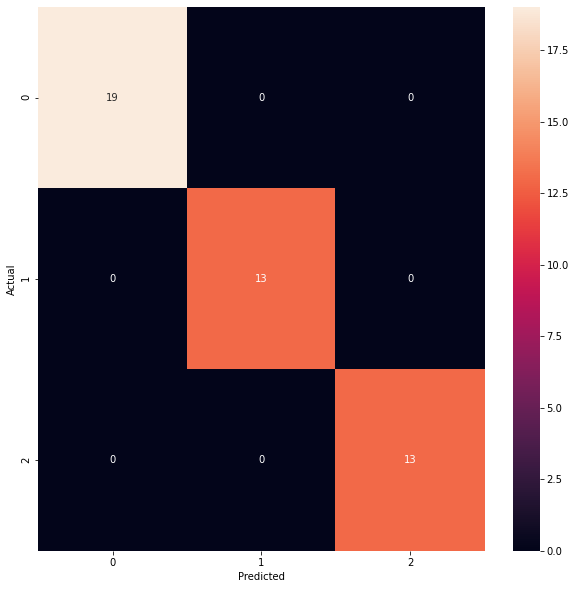

In [24]:
conf_mat = confusion_matrix(y_test, test_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification Report

In [25]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    
    to_predict = pd.DataFrame({'sepal_length':[sepal_length],
                               'sepal_width':[sepal_width],
                               'petal_length':[petal_length],
                               'petal_width':[petal_width]})
    
    to_predict_scaled = scaler.transform(to_predict)
    
    return best_model.predict(to_predict_scaled)[0]

predict_iris(sepal_length = 6.7,
             sepal_width = 3.0,
             petal_length = 5.2, 
             petal_width = 2.3)

'virginica'

# Saving Files

## Save MinMaxScaler

In [27]:
pickle.dump(scaler, open('MinMaxScaler.pkl', 'wb'))

## Save best_model

In [28]:
pickle.dump(best_model, open('iris_model_scaled.pkl', 'wb'))